In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
data = pd.read_csv('../data/final.csv')

/home/huy/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
full = pd.read_csv('../../Most-Recent-Cohorts-All-Data-Elements.csv')

/home/huy/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (6,9,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1379,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1412,1413,1427,1428,1431,1432,1503,1517,1532,1533,1534,1535,1536,1537,1538,1539,1540,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1567,1568,1573,1574,1575,1576,1577,1581,1582,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1604,1605,1606,1608,1610,1611,1614,1615,1616,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1636,1638,1640,1643,1644,1648,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1664,1666,1669,1670,1674,1679,1680,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690,1691,1692,1693,1695,1697,1700,1701,1702,1703,1704,1705,1706,1707,1711,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1844

In [32]:
cols = ["UNITID", "COSTT4_A", 'TUITIONFEE_IN', "TUITIONFEE_OUT", "BOOKSUPPLY", "ROOMBOARD_ON", "OTHEREXPENSE_ON", 
        "ROOMBOARD_OFF", "OTHEREXPENSE_OFF", "OTHEREXPENSE_FAM"]

In [33]:
ids = data[['UNITID']]

In [34]:
full_cols = full[cols]

In [35]:
costs = pd.merge(ids, full_cols, on="UNITID", how="left")

In [70]:
costs.iloc[7]

UNITID              100830.0
COSTT4_A             19849.0
TUITIONFEE_IN         8620.0
TUITIONFEE_OUT       18292.0
BOOKSUPPLY            1200.0
ROOMBOARD_ON          6980.0
OTHEREXPENSE_ON       3850.0
ROOMBOARD_OFF        10296.0
OTHEREXPENSE_OFF      3850.0
OTHEREXPENSE_FAM      3850.0
Name: 7, dtype: float64

In [71]:
curr_school = costs.iloc[7]

In [80]:
## on - off
labels = ["On Campus", "Off Campus"]
tuition = np.array(curr_school[["TUITIONFEE_IN", "TUITIONFEE_IN"]])
book_supply = np.array(curr_school[["BOOKSUPPLY", "BOOKSUPPLY"]])
room_board = np.array(curr_school[["ROOMBOARD_ON", "ROOMBOARD_OFF"]])
other_expense = np.array(curr_school[["OTHEREXPENSE_ON", "OTHEREXPENSE_OFF"]])

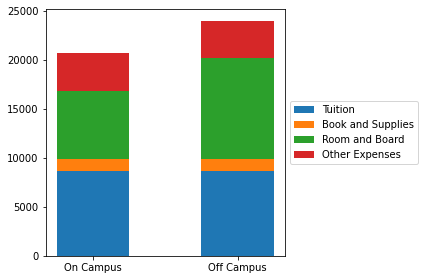

In [94]:
fig, ax = plt.subplots()
ax.bar(labels, tuition, width = 0.5, label="Tuition")
ax.bar(labels, book_supply, bottom=tuition, width = 0.5, label="Book and Supplies")
ax.bar(labels, room_board, bottom=book_supply + tuition, width = 0.5, label="Room and Board")
ax.bar(labels, other_expense, bottom=room_board + book_supply + tuition, width = 0.5, label="Other Expenses")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [103]:
cols = ["UNITID", "UGDS_WHITE", "UGDS_BLACK", "UGDS_HISP", "UGDS_ASIAN", "UGDS_AIAN", "UGDS_NHPI", "UGDS_MEN", "UGDS_WOMEN"]

In [97]:
full_cols = full[cols]

In [104]:
races = data[cols]

In [132]:
curr_school = races.iloc[103]

In [135]:
curr_school

UNITID        110680.0000
UGDS_WHITE         0.1936
UGDS_BLACK         0.0169
UGDS_HISP          0.2181
UGDS_ASIAN         0.3300
UGDS_AIAN          0.0008
UGDS_NHPI          0.0026
UGDS_MEN           0.4998
UGDS_WOMEN         0.5002
Name: 103, dtype: float64

In [150]:
white = curr_school['UGDS_WHITE']*100
black = curr_school['UGDS_BLACK']*100
hisp = curr_school['UGDS_HISP']*100
asian = curr_school['UGDS_ASIAN']*100
other = 100 - (white + black + hisp + asian)

In [153]:
labels = ["White", "Black", "Hispanic", "Asian", "Other"]
## Add Multi-ethnic
## Add pie chart of age and gender and income bracket
sizes = [white, black, hisp, asian, other]

([<matplotlib.patches.Wedge at 0x7f50f678b610>,
 [Text(0.9027378833388338, 0.6285414178754828, 'White'),
  Text(0.3264157494320401, 1.0504535965585151, 'Black'),
  Text(-0.46554116947636703, 0.9966300314171637, 'Hispanic'),
  Text(-0.9151921294162946, -0.6102649967468792, 'Asian'),
  Text(0.7985458884774024, -0.7565212911715282, 'Other')],
 [Text(0.492402481821182, 0.34284077338662694, '19.4%'),
  Text(0.17804495423565822, 0.5729746890319173, '1.7%'),
  Text(-0.25393154698710924, 0.5436163807729983, '21.8%'),
  Text(-0.49919570695434246, -0.3328718164073886, '33.0%'),
  Text(0.43557048462403763, -0.4126479770026517, '24.1%')])

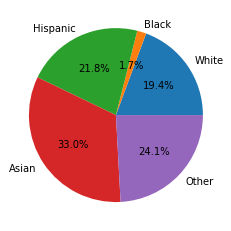

In [154]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

In [185]:
arts = ["PCIP04", "PCIP12", "PCIP50"]
science_math = ["PCIP01", "PCIP03", "PCIP25", "PCIP27", "PCIP29", "PCIP40", "PCIP41",
               "PCIP42", "PCIP51"]
business = ["PCIP52"]
engineering_tech = ["PCIP10", "PCIP11", "PCIP14", "PCIP15", "PCIP46",
                   "PCIP47", "PCIP48", "PCIP49"]
social_science = ["PCIP05", "PCIP09", "PCIP13", "PCIP16", "PCIP19", 
                  "PCIP22", "PCIP23", "PCIP24", "PCIP25", "PCIP30", "PCIP31",
                 "PCIP38", "PCIP39", "PCIP43", "PCIP44", "PCIP45", "PCIP54"]

In [186]:
full_cols = full[["UNITID"] + arts + science_math + business + engineering_tech + social_science]

In [187]:
majors = pd.merge(ids, full_cols, on="UNITID", how="left")

In [188]:
curr_school = majors.iloc[0]

In [196]:
arts_majors = curr_school[arts].sum()*100
science_math_majors = curr_school[science_math].sum()*100
business_majors = curr_school[business].sum()*100
engineering_tech_majors = curr_school[engineering_tech].sum()*100
social_science_majors = curr_school[social_science].sum()*100

In [197]:
labels = ("Arts Majors", "Science and Math Majors", "Business Majors", 
          "Engineering and Technology Majors", "Literature, Language and Social Science Majors")
y_pos = np.arange(len(labels))
length = [arts_majors, science_math_majors, business_majors, engineering_tech_majors, social_science_majors]

Text(0.5, 0, 'Percentage')

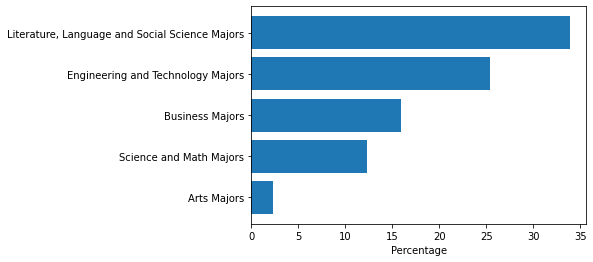

In [198]:
## dcc uses plotly -> translate code
fig, ax = plt.subplots()
ax.barh(y_pos, length)
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel("Percentage")

In [210]:
cols = ["UNITID", "MD_EARN_WNE_P6", "MD_EARN_WNE_P8", "MD_EARN_WNE_P10"]

In [211]:
full_cols = full[cols]

In [212]:
earnings = pd.merge(ids, full_cols, on="UNITID", how="left")

In [214]:
curr_school = earnings.iloc[0]

In [219]:
six = curr_school["MD_EARN_WNE_P6"]
eight = curr_school["MD_EARN_WNE_P8"]
ten = curr_school["MD_EARN_WNE_P10"]

Text(0, 0.5, 'Earnings')

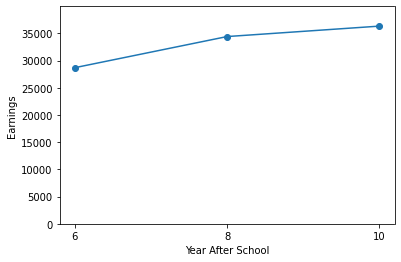

In [237]:
year = [6, 8, 10]
earns = [six, eight, ten]

fig, ax =plt.subplots()
ax.scatter(year, earns)
ax.plot(year, earns)
# ax.xaxis.set_major_locator(MaxNLocator(3)) 
ax.set_ylim([0, max(earns)+ (0.1*max(earns))])
plt.xticks([6, 8, 10])
ax.set_xlabel("Year After School")
ax.set_ylabel("Earnings")